## Sim Demo

### Imports

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from env.imports import *

In [13]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run)
importlib.reload(models.train_val)
importlib.reload(data.data_utils)
importlib.reload(data.data_load)


<module 'data.data_load' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/data/data_load.py'>

#### Check job specs

In [14]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 4.2%
RAM Usage: 6.0%
Available RAM: 1.4T
Total RAM: 1.5T
52.4G


In [15]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


0
Available GPUs: 1
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.11 GB


In [16]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  5% |


In [17]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

## Simulation tests <a id="sims"></a>

In [18]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='UKBB',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 2),
              track_wandb=True,
              skip_cv=True,
              model_type='shared_transformer_cls',
              use_gpu=True,
              null_model='none',
              use_folds=[0]
)

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
X_pca_full shape: (455, 455)
X_cell_types_Jorstad shape: (455, 24)
X_cell_types_LakeDFC shape: (455, 18)
X_cell_types_LakeVIS shape: (455, 18)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
connectome target FC
Y shape (455, 455)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: ylhhdyhn
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/ylhhdyhn
Initialized sweep with ID: ylhhdyhn


  warnings.warn(

  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



2
3
4
BEST CONFIG {'input_dim': 14760, 'token_encoder_dim': 20, 'd_model': 128, 'encoder_output_dim': 10, 'use_alibi': True, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256, 128], 'cls_init': 'spatial_learned', 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'weight_decay': 0.0001, 'batch_size': 1024, 'aug_prob': 0.3, 'aug_style': 'curriculum_swap_constant', 'epochs': 110, 'num_workers': 2, 'prefetch_factor': 4}
Number of learnable parameters in SMT w/ CLS model: 4686987


  from IPython.core.display import HTML, display  # type: ignore



Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.12 GB
Best val loss so far at epoch 1: 0.0463
Best val loss so far at epoch 2: 0.0380
Best val loss so far at epoch 3: 0.0259
Best val loss so far at epoch 5: 0.0258
Epoch 5/110, Train Loss: 0.0982, Val Loss: 0.0258, Time: 9.69s
Best val loss so far at epoch 6: 0.0248
Best val loss so far at epoch 7: 0.0237
Best val loss so far at epoch 10: 0.0225
Epoch 10/110, Train Loss: 0.0685, Val Loss: 0.0225, Time: 11.23s
Best val loss so far at epoch 13: 0.0189
Epoch 15/110, Train Loss: 0.0591, Val Loss: 0.0190, Time: 10.04s
Best val loss so far at epoch 18: 0.0186
Best val loss so far at epoch 19: 0.0172
Epoch 20/110, Train Loss: 0.0466, Val Loss: 0.0177, Time: 9.75s
Best val loss so far at epoch 23: 0.0162
Epoch 25/110, Train Loss: 0.0495, Val Loss: 0.0166, Time: 10.04s
Best val loss so far at epoch 26: 0.0152


Exception ignored in: <function WeakValueDictionary.__init__.<locals>.remove at 0x14df16e504a0>
Traceback (most recent call last):
  File "/ext3/miniconda3/lib/python3.11/weakref.py", line 105, in remove
    def remove(wr, selfref=ref(self), _atomic_removal=_remove_dead_weakref):

KeyboardInterrupt: 


RuntimeError: DataLoader worker (pid(s) 2147362, 2147363) exited unexpectedly

Number of components for 95% variance PCA: 16
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 105)
X_pca shape: (455, 16)
X_pca_full shape: (455, 105)
X_cell_types_Jorstad shape: (455, 24)
X_cell_types_LakeDFC shape: (455, 18)
X_cell_types_LakeVIS shape: (455, 18)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
connectome target FC
Y shape (455, 455)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: rziuo4zd
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/rziuo4zd
Initialized sweep with ID: rziuo4zd
2
3
4
BEST CONFIG {'input_dim': 210, 'expression_bins': 20, 'd_model': 128, 'nhead': 2, 'num_layers': 2, 'deep_hidden_dims': [512, 256, 128], 'cls_init': 'random', 'pooling_mode': 'attention', 'use_alibi': False, 'transformer_dropout': 0.1, 'dropout_rate': 0.1, 'learning_rate': 3.5e-05, 'weight_decay': 1e-05, 'batch_size': 1024, 'epochs': 100, 'aug_prob': 0.0, 'aug_style': 'linear_decay', 'lambda_sym': 0.0, 'num_workers': 2, 'prefetch_factor': 4, 'cosine_lr': False}


  warnings.warn(

  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



Loaded Gene2Vec embeddings: 102 genes with 200-dimensional embeddings
Gene overlap: 102/105 valid genes have Gene2Vec embeddings
Number of learnable parameters in Bidirectional CrossAttentionGene2Vec model: 762352
Number of genes after Gene2Vec intersection: 102
Expression bins: 20
CLS token initialization: random
Pooling mode: attention
Value dimension: 256 (2x query/key d_model=128)


  from IPython.core.display import HTML, display  # type: ignore



Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 1.92 GB
Best val loss so far at epoch 1: 0.0532
Best val loss so far at epoch 2: 0.0420
Best val loss so far at epoch 3: 0.0371
Best val loss so far at epoch 4: 0.0349
Best val loss so far at epoch 5: 0.0336
Epoch 5/100, Train Loss: 0.0645, Val Loss: 0.0336, Time: 1.91s
Best val loss so far at epoch 6: 0.0329
Best val loss so far at epoch 7: 0.0325
Best val loss so far at epoch 8: 0.0319
Best val loss so far at epoch 9: 0.0317
Epoch 10/100, Train Loss: 0.0499, Val Loss: 0.0322, Time: 1.90s
Best val loss so far at epoch 11: 0.0313
Best val loss so far at epoch 14: 0.0308
Best val loss so far at epoch 15: 0.0307
Epoch 15/100, Train Loss: 0.0406, Val Loss: 0.0307, Time: 1.91s
Best val loss so far at epoch 16: 0.0299
Best val loss so far at epoch 17: 0.0297
Best val loss so far at epoch 18: 0.0294
Best val loss so far at epoch 19: 0.0291
Best val loss so far at epoch 20: 0.0282
Epoch 20/100, Train Loss: 0.0322, Val Loss: 0

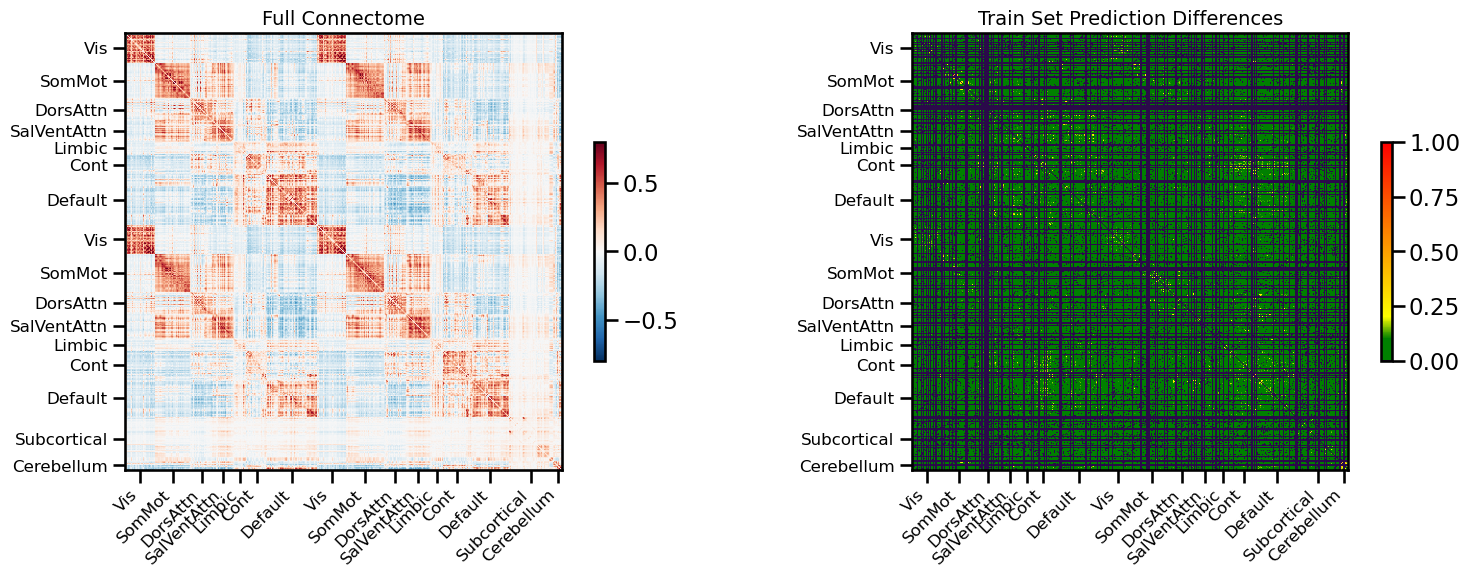

<Figure size 640x480 with 0 Axes>

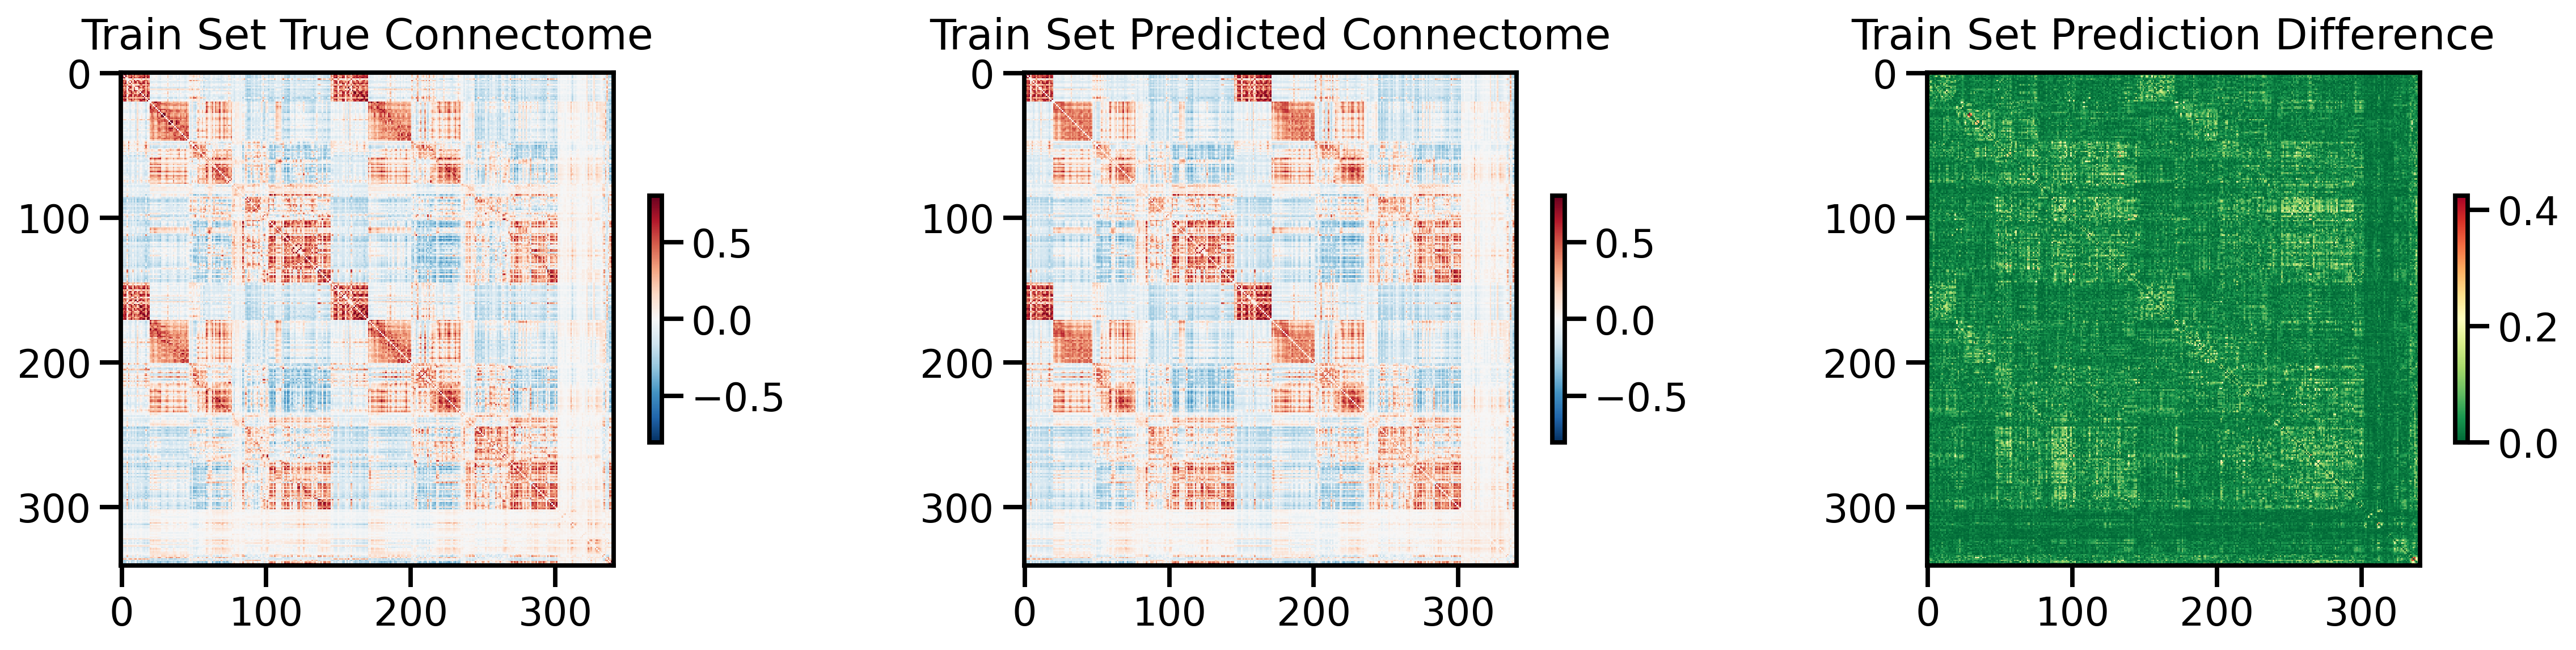

<Figure size 640x480 with 0 Axes>

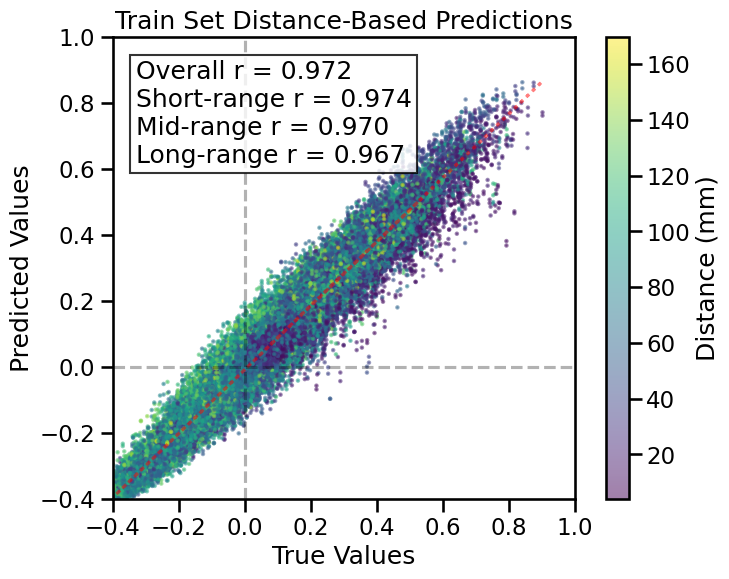

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 114 regions, 12882 connections


<Figure size 640x480 with 0 Axes>

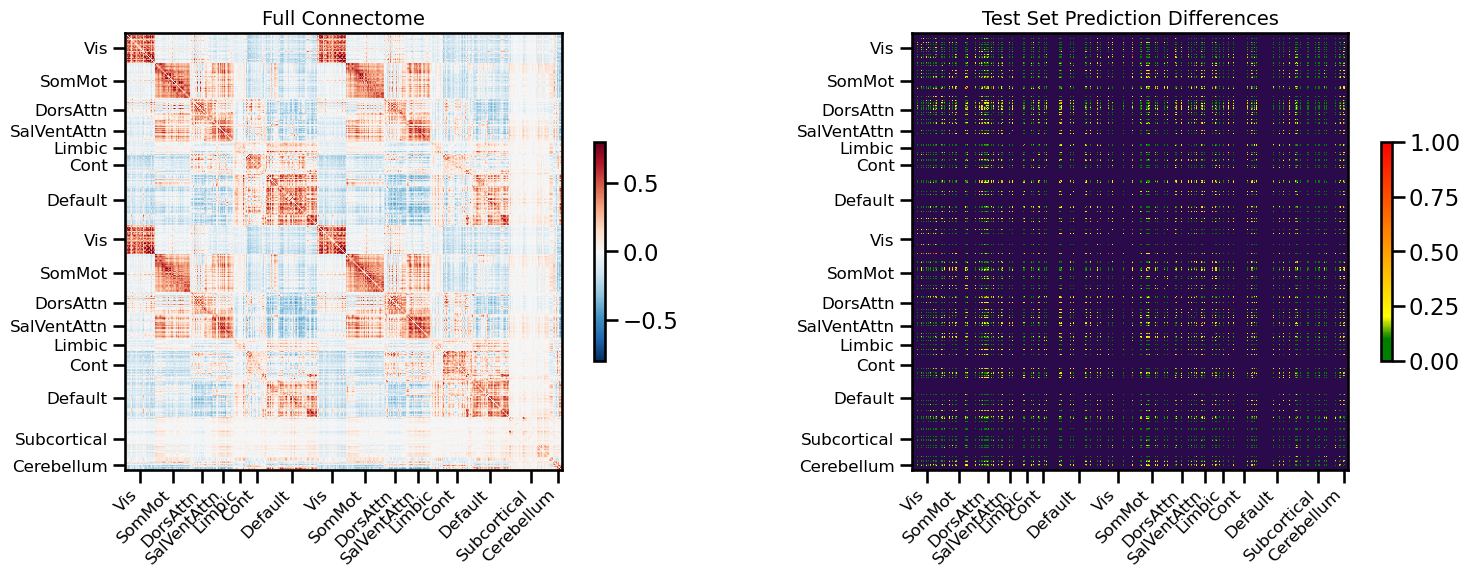

<Figure size 640x480 with 0 Axes>

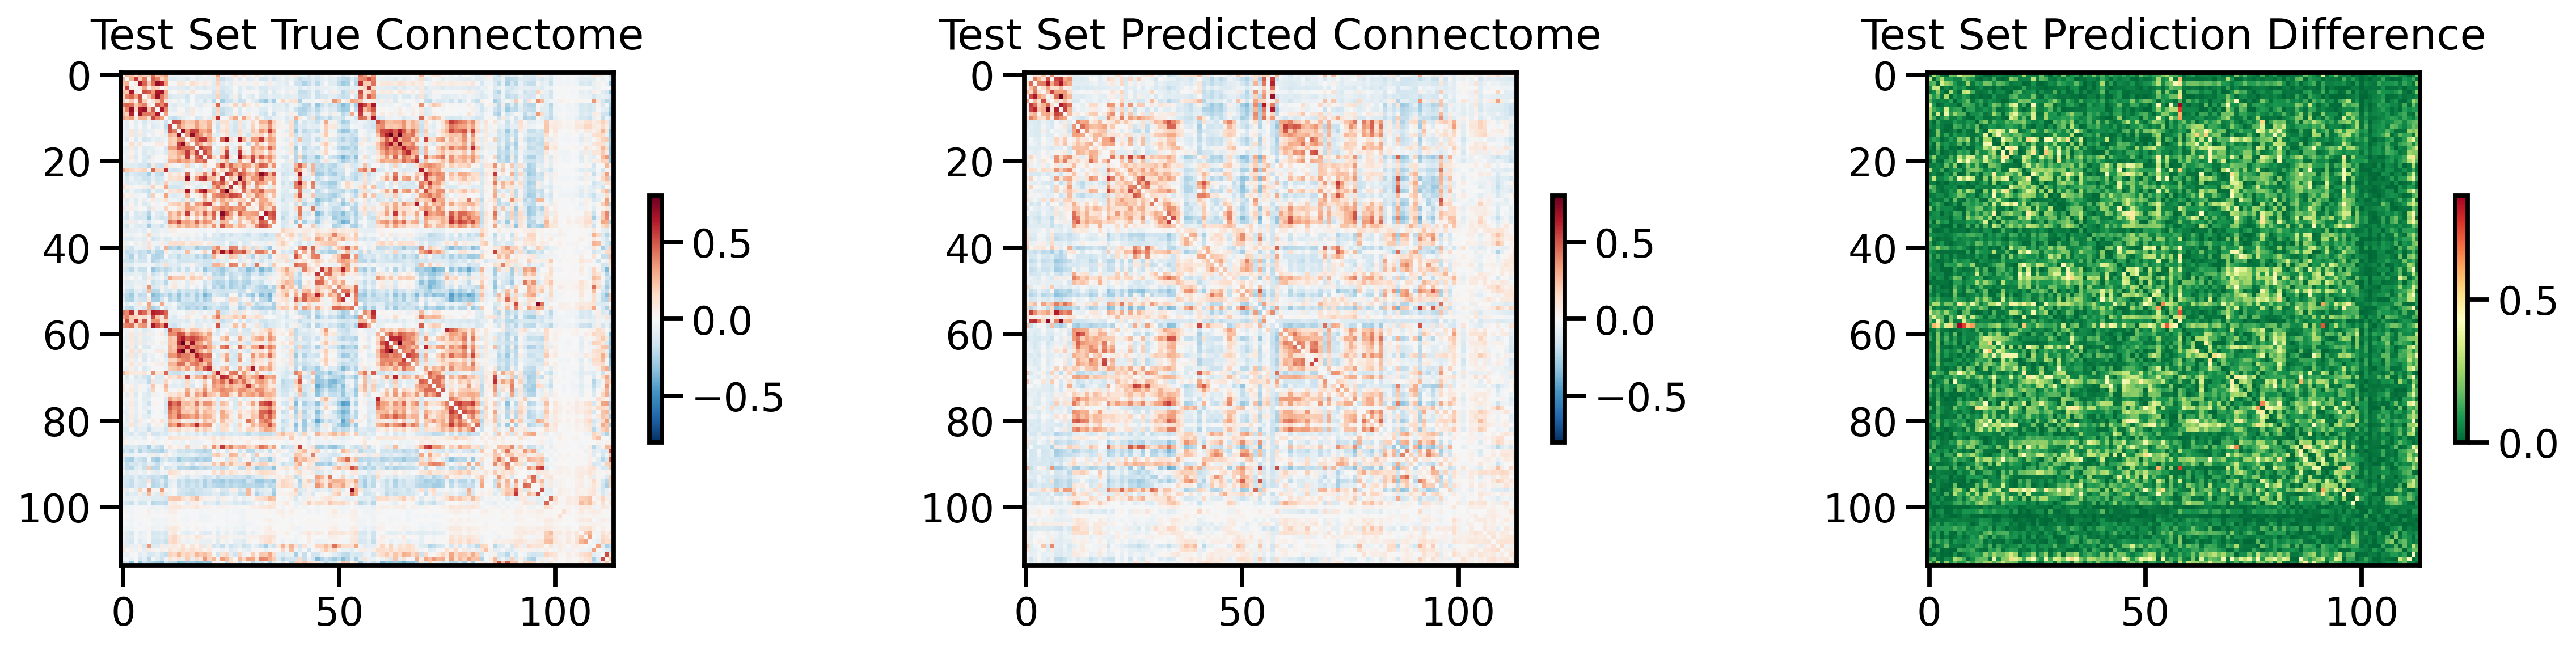

<Figure size 640x480 with 0 Axes>

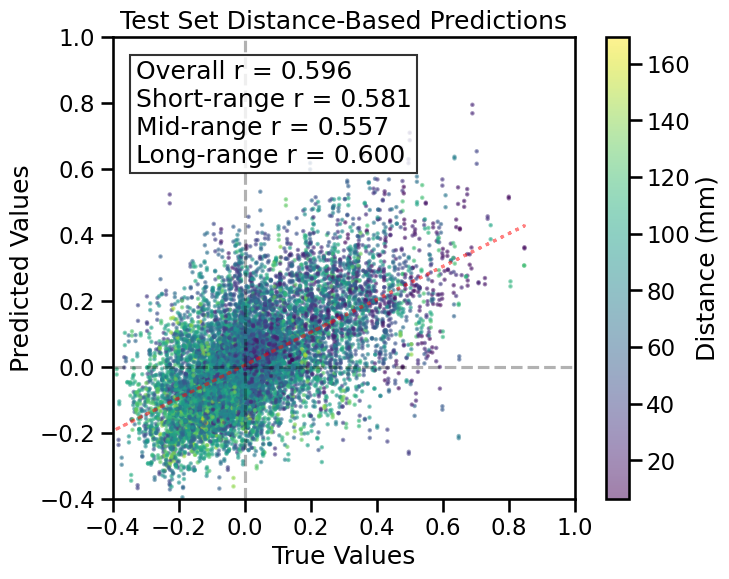

TRAIN METRICS
GLOBAL: mse=0.001937, mae=0.032284, r2=0.9428, pearson_r=0.9723, spearman_r=0.9656, geodesic_distance=15.0007
DISTANCE-BASED: short=0.9742, mid=0.9703, long=0.9672
HEMISPHERIC: left=0.9720, right=0.9776, inter=0.9716
CONNECTION STRENGTH: neg=0.6989, weak=0.9513, pos=0.8271
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Cont          0.9639    0.9677
  Default       0.9455    0.9609
  SalVentAttn    0.9705    0.9732
  Limbic        0.9679    0.9723
  DorsAttn      0.9747    0.9766
  SomMot        0.9794    0.9741
  Vis           0.9847    0.9784
  Subcortical    0.9386    0.9627
  Cerebellum    0.9730    0.9538

TEST METRICS
GLOBAL: mse=0.023012, mae=0.111268, r2=0.2971, pearson_r=0.5963, spearman_r=0.5743, geodesic_distance=12.1786
DISTANCE-BASED: short=0.5812, mid=0.5571, long=0.5998
HEMISPHERIC: left=0.6486, right=0.5625, inter=0.5713
CONNECTION STRENGTH: neg=-0.0531, weak=0.5008, pos=0.2211
NETWORK CORRELATIONS:
  NETWORK      

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 6.1%
RAM Usage: 4.2%
Available RAM: 1.4T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |
Sim complete
Simulation completed in 230.12 seconds (3.84 minutes)


7016

<Figure size 640x480 with 0 Axes>

In [47]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='UKBB',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='richiardi2015',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 2),
              track_wandb=True,
              skip_cv=True,
              model_type='cross_attention_gene2vec',
              use_gpu=True,
              null_model='none',
              use_folds=[0]
)

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()